In [1]:
from astroquery.vizier import Vizier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u

 - Plano: Pegar informações de Makemake do Gaia e do JPL (efeméride) e comparar suas posições/movimento

>**Makemake** é o segundo *planeta anão* mais afastado do Sol, com um semieixo maior médio de 45,790 UA. Atualmente, está a uma distância de 52,5 UA do Sol, quase atingindo seu afélio (53,073 UA), o que acontecerá em 2033.  
>
>Sua órbita é parecida à de Haumea, com uma alta inclinação de 29° e excentricidade moderada de 0,16°, mas é mais afastada do Sol em termos de semieixo maior, perélio e afélio. O período orbital de **Makemake** é de aproximadamente 310 anos, maior que o de Plutão (248 anos) e Haumea (284 anos).  

 - Carregando arquivo da efeméride baixado (servirá como verificação do query):

In [2]:
df_ef = pd.read_csv('ef.csv',sep=',',comment='*'
                    ,na_values='n.a.')
df_ef = df_ef.drop(columns=[' .1','/r'])

 - Carregando GaiaDr3

In [3]:
df_vi = pd.read_csv('vi.csv', sep=';', comment='#', #na_values=' '
                   )
df_vi = df_vi.dropna(axis = 1) 
df_vi = df_vi.drop(columns = ['_RAJ2000','_DEJ2000','SolID','Source','MPC','FG'])

 - Descrever dados estatísticos básicos de ambos catálogos:

In [4]:
df_ef.describe()

,R.A._(ICRF),DEC_(ICRF),APmag,delta,deldot,S-O-T,S-T-O,Sky_motion,Sky_mot_PA,RelVel-ANG
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,198.983140,22.071469,17.139672,52.658886,0.099526,89.114765,0.823847,0.035659,185.894438,0.217097
std,0.807533,0.386501,0.032915,0.621631,18.617744,41.439364,0.204101,0.009551,96.661397,41.326314
min,197.517850,21.489410,17.069000,51.774660,-26.625859,27.229200,0.498600,0.021022,1.967029,-63.151880
25%,198.324627,21.679308,17.119250,52.039414,-18.403902,50.481650,0.626525,0.026836,108.742055,-38.065780
50%,198.997440,22.133625,17.150000,52.668035,0.529676,88.819600,0.847600,0.036023,159.270225,0.980972
75%,199.766115,22.444335,17.167000,53.278041,18.637997,127.782825,1.022650,0.041745,282.318252,38.754866
max,200.094120,22.673450,17.175000,53.533086,25.988608,151.828400,1.105400,0.051708,359.954500,61.362739


In [5]:
df_vi.describe()

,RA_ICRS,DE_ICRS,Epoch,Gmag,VX,VY,VZ,PA deg
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,194.444773,24.628568,2315.311778,17.138099,-0.014389,0.006777,0.002909,233.852398
std,0.782700,0.282834,262.995108,0.015190,0.002124,0.006044,0.002597,32.349711
min,193.015194,24.315297,1769.933172,17.113745,-0.017131,-0.004493,-0.001929,171.094800
25%,193.841560,24.361800,2136.048594,17.129744,-0.016932,0.003607,0.001543,212.536450
50%,194.821995,24.551642,2511.095782,17.141241,-0.014300,0.009320,0.004000,253.798800
75%,195.150822,24.786101,2533.596034,17.142765,-0.012380,0.011406,0.004900,254.463050
max,195.358822,25.244548,2562.582274,17.161739,-0.012205,0.011586,0.004978,258.107500


 - Somar 2455197.5 pra todas as linhas do Epoch vai passar a data pra Juliano. O objetivo é pegar essas datas e gerar uma nova efeméride de acordo. Lembrando, **'Date Julian' é contado após janeiro de 2000 meio dia -> contado em dias** (por conveniência).

In [ ]:
#Em graus (1º) - e as subunidades dos graus são os minutos (1º = 60') e os segundos (1' = 60"). Não só isso, 1hora cobre 15° no relógio -> 360°/24hrs. 

In [7]:
from astropy.time import Time
t = Time(2455197.5 + 2315.311 #epoch média
         , format='jd')
#t.iso , t.byear, t.jd...
print('A data média dos dados do GaiaDR3: ', t.iso)
tm = Time(2455197.5+2511.095 #epoch 50%
          , format='jd')
print('A data mediana dos dados do GaiaDR3: ',tm.iso)

A data média dos dados do GaiaDR3:  2016-05-04 07:27:50.400
A data mediana dos dados do GaiaDR3:  2016-11-16 02:16:48.000


In [8]:
#Passando todas as date_julian do gaia para datatime_str
datetime_str = []
for i in range(len(df_vi['Epoch'])):
    datetime_str.append((Time(df_vi['Epoch'].loc[i] + 2455197.5, format = 'jd')).iso)

df_vi['Datetime_str'] = datetime_str

In [9]:
#Organizando por valor de Epoch para facilitar a comparação com as Efemérides.
df_vi = df_vi.sort_values(by=['Epoch']
                  #, ascending=False para organizar de ordem decrescente
                 )

 - Deveres:
>Fazer um query p pegar a efemeride relativo ao tempo exato de cada ponto e ir construindo o banco de dados de forma recursiva.
>
>Identificar a lua da makemake utilizando RA_ef - RA_gaia; DEC_ef - DEC_gaia -> plotar o deltaRA/tempo e deltaDEC/tempo -> sistemas binarios irão possuir um plot ondulatório já que a medida do gaia é precisa a ponto de identificar esse comportamento.
>
>Verificar a diferença de magnitude aparente medida pela efeméride e a Gmag do Gaia.

 - Histograma relativo a cada coluna dos dados do gaia:

/home/laidler/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


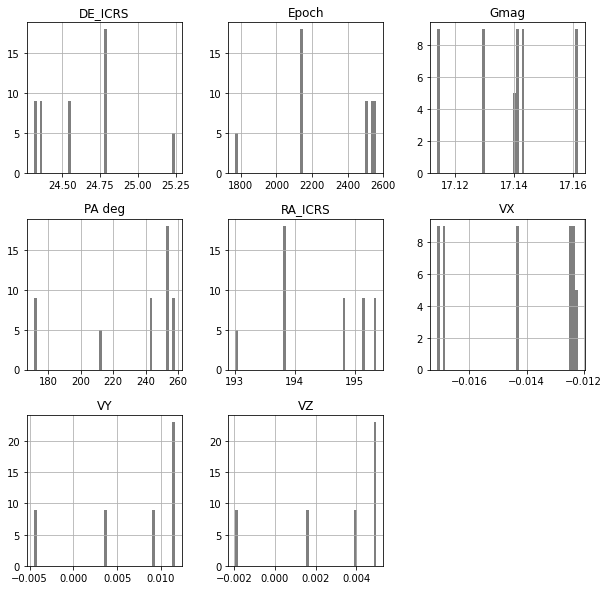

In [10]:
df_vi.hist(color="k", alpha=0.5, bins=50, figsize=[10,10])
plt.show()

 - Criando uma lista com todos os valores da epoch de cada dado do Gaia e buscar por essas datas nas efemérides:

In [11]:
df_vi['JD'] = df_vi['Epoch'] + 2455197.5

In [12]:
jd = []
for i in range(len(df_vi['Epoch'])):
    jd.append(round(df_vi['Epoch'][i],5) + 2455197.5 )

In [13]:
from astroquery.jplhorizons import Horizons

obj = Horizons(id='MakeMake', #location='568', 
               epochs=jd)

eph = obj.ephemerides()

In [14]:
df_EF = eph.to_pandas() # Data Frame da Efemeride pega pelo query com base nos tempos do Gaia
#dropar todas as colunas que não sejam importantes para nossa análise.
df_EF = df_EF.drop(columns = ['solar_presence','flags',
                                  'AZ','EL','AZ_rate','EL_rate','sat_X','sat_Y','sat_PANG','airmass','magextinct',
                                  'surfbright','illumination','illum_defect',
                                  'sat_sep','sat_vis','ang_width',
       'PDObsLon', 'PDObsLat', 'PDSunLon', 'PDSunLat', 'SubSol_ang',
       'SubSol_dist', 'NPole_ang', 'NPole_dist', 'EclLon', 'EclLat', 'r',
       'r_rate', 'delta', 'delta_rate', 'lighttime', 'vel_sun', 'vel_obs',
       'elong', 'elongFlag', 'alpha', 'lunar_elong', 'lunar_illum',
       'sat_alpha', 'sunTargetPA', 'velocityPA', 'OrbPlaneAng',
       'constellation', 'TDB-UT', 'ObsEclLon', 'ObsEclLat', 'NPole_RA',
       'NPole_DEC', 'GlxLon', 'GlxLat', 'solartime', 'earth_lighttime',
       'SMAA_3sigma', 'SMIA_3sigma', 'Theta_3sigma',
       'Area_3sigma', 'RSS_3sigma', 'r_3sigma', 'r_rate_3sigma',
       'SBand_3sigma', 'XBand_3sigma', 'DoppDelay_3sigma', 'true_anom',
       'hour_angle', 'alpha_true', 'PABLon', 'PABLat','siderealtime'])

In [15]:
df_EF.describe() # Verificando com os dados recolhidos da efeméride manualmente

,datetime_jd,H,G,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,V,RA_3sigma,DEC_3sigma
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.457513e+06,-2.100000e-01,1.500000e-01,194.435782,24.634281,194.628842,24.546540,1.936090,0.210402,17.149140,0.015580,0.014600
std,2.629951e+02,1.962616e-16,1.401868e-16,0.781039,0.283192,0.789886,0.286765,0.839419,0.604085,0.005935,0.004734,0.002642
min,2.456967e+06,-2.100000e-01,1.500000e-01,193.008080,24.321610,193.184200,24.231980,0.324009,-0.281880,17.140000,0.010000,0.011000
25%,2.457334e+06,-2.100000e-01,1.500000e-01,193.834170,24.367010,194.020760,24.275860,1.586369,-0.278270,17.145000,0.011000,0.012000
50%,2.457709e+06,-2.100000e-01,1.500000e-01,194.813370,24.555440,195.011110,24.462540,2.334348,-0.022810,17.148000,0.017000,0.017000
75%,2.457731e+06,-2.100000e-01,1.500000e-01,195.140107,24.792560,195.340130,24.707940,2.548033,0.621684,17.155000,0.020000,0.017000
max,2.457760e+06,-2.100000e-01,1.500000e-01,195.346970,25.250880,195.550730,25.170730,2.549718,1.283227,17.157000,0.022000,0.017000


 - Comparando dataframes:
 Aqui também queremos verificar se as datas buscadas no query estão batendo, por isso a coluna 'datetime_str' criada anteriormente.

In [16]:
# df_ef
# df_EF
# df_vi

/home/laidler/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


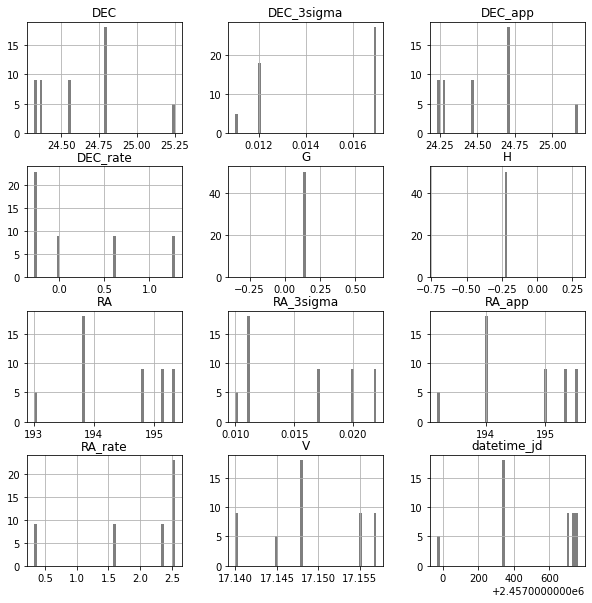

In [17]:
df_EF.hist(color="k", alpha=0.5, bins=50, figsize=[10,10])
plt.show()

 - Plotando RA_ef - RA_gaia; DEC_ef - DEC_gaia a fim de identificar um possivel satélite do planeta anão.
 >>Sistemas binarios possuem um plot ondulatório, já que a medida do gaia é precisa a ponto de identificar esse comportamento.

    Para que esse plot seja possível, teremos que somar 2455197.5 a todos os valores de Epoch do gaia (df_vi) (isso já foi feito, está na variável jd). 
    
    No entanto, resta arredondar os valores após certa casa decimail. E deveremos arredondar da mesma forma para as efemérides. Isso pois há uma leve diferença entre os tempos do gaia e das efemérides, de forma que o computador não identifica-os como sendo os mesmos pontos. Portanto, a fim de termos uma array com os tempos corretos para o plot (50 elementos no eixo x para 50 elementos no eixo y), irei criar essa array de forma arredondada - o numero de casas decimais escolhida passou pelos devidos testes, escolhi aquela necessária para que a primeira linha de um catalogo fosse igual a primeira ligua do segundo, e assim por diante (e de forma independentente, de forma que a primeira linha de um catalogo não fosse igual a primeira E a segunda linha do segundo).

In [18]:
RA_ef = df_EF['RA']
RA_gaia = df_vi['RA_ICRS']

DEC_ef = df_EF['DEC']
DEC_gaia = df_vi['DE_ICRS']

tempo = [] #julian date arredondado
for i in range(len(jd)):
    tempo.append(round(jd[i],5))
tempo.sort()

In [19]:
#### Conferindo se os pontos da lista 'tempo' coincide com as informações dos data frames na ordem correta.
#RA_gaia -> 193.015229 (1) 2014-11-05 22:23:46.061
#RA_ef ->   193.00808  (1) 2014-Nov-05 22:23:45.888
#tempo -> 2456967.43317 -> 1769.933172 + 2455197.5 = 2456967.433172
### Bate... então teoricamente o plot deveria estar correto...

 - Plot que busco

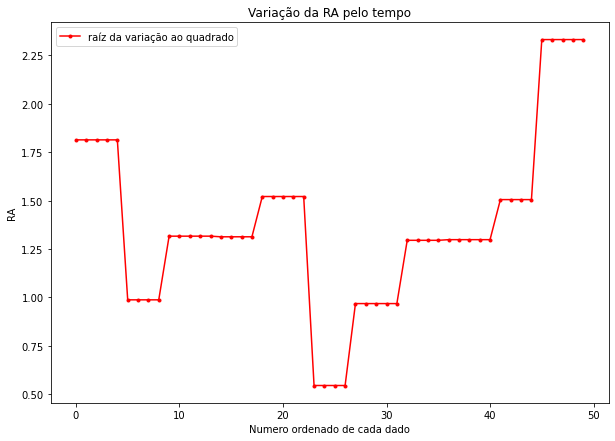

In [20]:
plt.figure(figsize = [10,7])
plt.title('Variação da RA pelo tempo')
plt.plot(list(range(50)),np.sqrt((RA_gaia - RA_ef)**2), 'r.-')
plt.legend(['raíz da variação ao quadrado'])
plt.xlabel('Numero ordenado de cada dado')
#plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('RA')
plt.show()

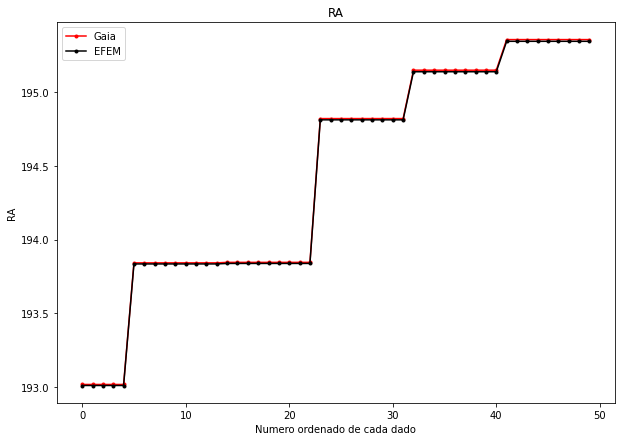

In [40]:
plt.figure(figsize = [10,7])
plt.title('RA')
plt.plot(list(range(50)),RA_gaia, 'r.-')
plt.plot(list(range(50)),RA_ef, 'k.-')
plt.legend(['Gaia', 'EFEM'])
plt.xlabel('Numero ordenado de cada dado')
#plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('RA')
plt.show()

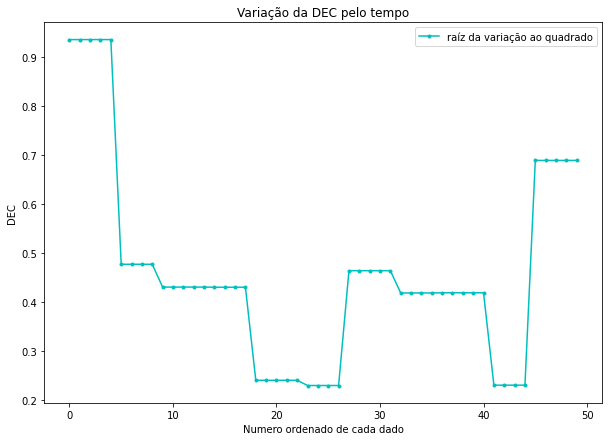

In [22]:
plt.figure(figsize = [10,7])
plt.title('Variação da DEC pelo tempo')
plt.plot(list(range(50)),np.sqrt((DEC_gaia - DEC_ef)**2), 'c.-')
plt.legend(['raíz da variação ao quadrado'])
plt.xlabel('Numero ordenado de cada dado')
#plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('DEC')
plt.show()

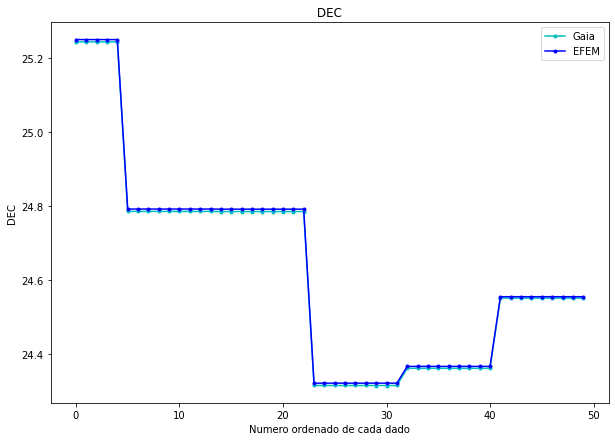

In [39]:
plt.figure(figsize = [10,7])
plt.title(' DEC ')
plt.plot(list(range(50)),DEC_gaia, 'c.-')
plt.plot(list(range(50)), DEC_ef, 'b.-')
plt.legend(['Gaia', 'EFEM'])
plt.xlabel('Numero ordenado de cada dado')
plt.ylabel('DEC')
plt.show()

 - Plots uteis:
 
 >>Utilizando as informações de tempo, os catalogos possuem apenas 5 observações distintas, o que faz com que os pontos estejam juntos demais em certos momentos. Isso causa uma falsa impressão de que há menos pontos.

In [24]:
########### Testagem ###############################
#tempo

#test = [] #julian date arredondado
#for i in range(len(jd)):
#    test.append(round(df_EF['datetime_jd'][i],6))
#test.sort()

#plt.ylim(1.5, 2)
#plt.xlim(2456967.33317,2457333.54836)
#plt.plot(df_vi['Datetime_str'],np.sqrt((RA_gaia - RA_ef)**2),'-o')
#plt.plot(df_vi['Epoch'],df_vi['RA_ICRS'],'-o')
#plt.plot(df_vi['Epoch'],range(50),'-o')
#plt.plot(df_vi['Datetime_str'],range(50),'-o')

In [25]:
def estaordenado(lista):
    '''Tentantiva final: verificar se o array do tempo realmente está ordenado. No entanto, vi que não
    foi este o problema... Mas de qualquer forma, deixarei a função aqui.'''
    for i in range(len(lista)):
        print(len(lista) - 1)
        while i < (len(lista) - 2):
            if lista[i] > lista[i+1]:
                return 'Nao eh ordenado'
            else:
                return np.array(lista)

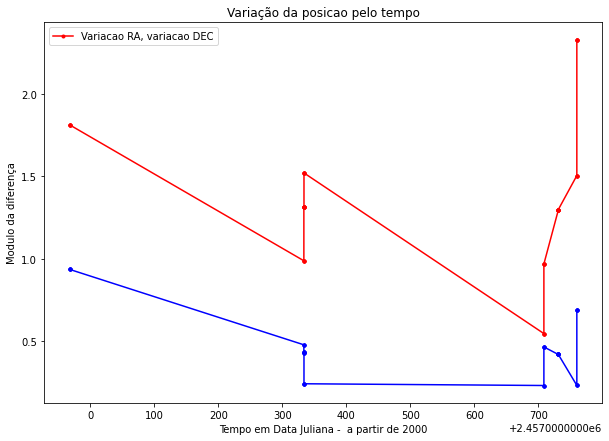

In [38]:
plt.figure(figsize = [10,7])
plt.title('Variação da posicao pelo tempo')
plt.plot(tempo,np.sqrt((RA_gaia - RA_ef)**2), 'r.-')
plt.plot(tempo,np.sqrt((DEC_ef - DEC_gaia)**2),'b.-')
plt.legend(['Variacao RA, variacao DEC'])
plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('Modulo da diferença')
plt.show()

A falta de dados entre estas observações compromete a visualização da onda mais formalizada.

 #### Comparando magnitudes:
Para quantificar a cor de algum corpo celeste, o observamos usando filtros que só permitem a passagem de luz restrita a um intervalo pequeno de comprimento de onda. Ao amostrarmos o espectro em dois ou mais diferentes domínios de comprimento de onda, podemos então determinar se o espectro é de um corpo quente, morno ou frio.

As estrelas mais quentes, por exemplo, têm temperaturas da ordem de 60.000 K, enquanto as mais frias têm temperaturas de uns 3,000 K.


A cor das estrelas depende de sua temperatura.
>estrelas quentes são azuladas e estrelas frias são avermelhadas.

O "índice de cor B-V" permite quantificar a cor de uma estrela usando medidas de magnitude em dois filtros: o filtro B, que só permite a passagem de luz no domínio azul do espectro e o filtro V, que transmite apenas a luz no domínio de comprimento de onda consistente com o verde-amarelo. A diferença de magnitudes B-V, portanto, quantifica a importância relativa desses dois domínios do espectro para o fluxo total da estrela.

Uma estrela quente tem B-V próximo a zero enquanto que uma estrela fria possui B-V = 2.0 aproximadamente. Outras estrelas têm valores intermediários (o Sol, por exemplo, tem B-V = 0.6). 

>> Filtros B,V,G,R dividem o espectro considerado visível indo do azul ao vermelho (nessa ordem). 
>
>>Filtros como I,J e H dividem o espectro próximo ao infravermelho, sendo o H caracterizado com Ponto Médio do Comprimento de Onda Efetivo (λeff) de 1630 nm.
>
>> Vamos verificar a diferença de magnitude aparente medida pela efeméride (V) e a magnitude do Gaia (filtro G).

Os índices de cor são simplesmente as medidas da diferença entre a magnitude aparente do objeto visto pelo filtro B (azul), V (visivel, verde-amarelo) e R (vermelho). Podemos analisar makemake com base nesse índice.

In [28]:
V = df_EF['V'] #magnitude absoluta no Visivel
H = df_EF['H'] 
G_ef = df_EF['G']

In [29]:
G = df_vi['Gmag'] #magnitude absoluta no Green

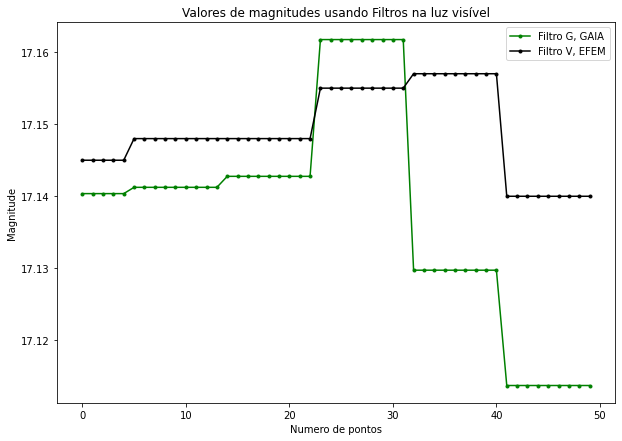

In [30]:
plt.figure(figsize = [10,7])
plt.title('Valores de magnitudes usando Filtros na luz visível')
plt.plot(list(range(50)),G, 'g.-')
plt.plot(list(range(50)),V,'k.-')
plt.legend(['Filtro G, GAIA','Filtro V, EFEM'])
plt.xlabel('Numero de pontos')
#plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('Magnitude')
plt.show()

 - A contagem na luz visivel é bem parecido no gaia e na efeméride. Suas diferenças estão no filtro utilizado, o que nos indica que makemake brilha avermelhado no espectro visivel (as magnitude em G, mais proxima do vermelho, são em média menores).

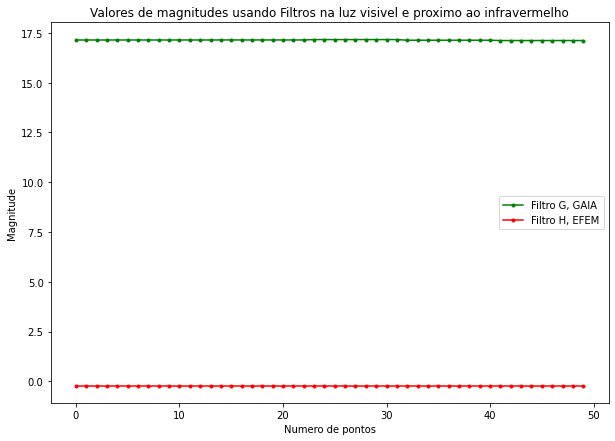

In [31]:
plt.figure(figsize = [10,7])
plt.title('Valores de magnitudes usando Filtros na luz visivel e proximo ao infravermelho')
plt.plot(list(range(50)),G, 'g.-')
plt.plot(list(range(50)),H,'r.-')
plt.legend(['Filtro G, GAIA','Filtro H, EFEM'])
plt.xlabel('Numero de pontos')
#plt.xlabel('Tempo em Data Juliana -  a partir de 2000')
plt.ylabel('Magnitude')
plt.show()

 - Podemos ver que o brilho de makemake é avermelhado, tendo magnitude inclusive negativa quando utilizamos filtros mais proximos do infravermelho.
 - Nos indica também uma baixa temperatura.

In [32]:
V.describe() # Medida efeméride

count    50.000000
mean     17.149140
std       0.005935
min      17.140000
25%      17.145000
50%      17.148000
75%      17.155000
max      17.157000
Name: V, dtype: float64

In [33]:
G.describe() # medida do gaia

count    50.000000
mean     17.138099
std       0.015190
min      17.113745
25%      17.129744
50%      17.141241
75%      17.142765
max      17.161739
Name: Gmag, dtype: float64

In [34]:
H.describe()

count    5.000000e+01
mean    -2.100000e-01
std      1.962616e-16
min     -2.100000e-01
25%     -2.100000e-01
50%     -2.100000e-01
75%     -2.100000e-01
max     -2.100000e-01
Name: H, dtype: float64